<a href="https://colab.research.google.com/github/KaisenWu/MachineLearning_Project_RegressorComparison_Python/blob/main/MachineLearning_Project_RegressorComparison_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Regressors Comparison with Pipeline by Kaisen</center>

## Project Overview
1. This project use a dataset which contains 16 features related to course regitration.
2. The target feture is 'enrollment'.
3. In this project, I'm going to use build pipelines with different regressor. And find out which regressor has the best prediction of 'enrollment'.

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab1/course_data_prepared.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
avg_rating,4.500000,3.300000,4.400000,4.700000,4.300000
number_ratings,2826.000000,320.000000,991.000000,556.000000,2060.000000
enrollment,14269.000000,2088.000000,3563.000000,2263.000000,10927.000000
last_updated,20.100000,17.020000,20.080000,20.100000,20.070000
lectures,41.000000,72.000000,91.000000,70.000000,477.000000
duration,7.133333,4.133333,5.233333,4.966667,51.983333
price,19.990000,16.990000,28.990000,16.990000,20.990000
discount,88.000000,90.000000,77.000000,88.000000,87.000000
inst_rating,4.500000,3.300000,4.400000,4.600000,4.500000
inst_review,11922.000000,320.000000,2193.000000,74745.000000,288507.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_rating          1429 non-null   float64
 1   number_ratings      1429 non-null   float64
 2   enrollment          1429 non-null   float64
 3   last_updated        1429 non-null   float64
 4   lectures            1429 non-null   float64
 5   duration            1429 non-null   float64
 6   price               1429 non-null   float64
 7   discount            1429 non-null   int64  
 8   inst_rating         1429 non-null   float64
 9   inst_review         1429 non-null   float64
 10  inst_student        1429 non-null   float64
 11  inst_course         1429 non-null   float64
 12  cat_design          1429 non-null   int64  
 13  cat_development     1429 non-null   int64  
 14  cat_it_software     1429 non-null   int64  
 15  cat_personal_hobby  1429 non-null   int64  
dtypes: flo

## Split The Dataset

In [5]:
# Extract target feature and others.
X = df.drop('enrollment', axis=1).values
y = df['enrollment'].values

In [6]:
# Import the train test split library.
from sklearn.model_selection import train_test_split

In [7]:
# Split the data to testing and training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Prepare data tranformer, scaler and feature selector.

In [8]:
# Declare a Polynomial transformer.
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [9]:
# Declare a MinMax scaler instance.
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [10]:
# Declare a feature selector instance.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
fl = SelectFromModel(RandomForestClassifier())

In [11]:
# Create lists of pipelines and measurement parameters.
r2_list = []
rmse_list = []
pipes = []
regressions = []
predictions_list = []

## Build Pipelines

In [12]:
# Import the pipeline library.
from sklearn.pipeline import Pipeline

In [13]:
# Define the pipeline with linear regression.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
pipe1 = Pipeline([
    ("transformer", pf),
    ("scaler", mm),
    ("selector", fl),
    ("regression", lr)])
pipes.append(pipe1)
regressions.append(lr.__class__.__name__)

In [14]:
# Define the pipeline with decision tree regressor.
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
pipe2 = Pipeline([
    ("transformer", pf),
    ("scaler", mm),
    ("selector", fl),
    ("regression", dtr)])
pipes.append(pipe2)
regressions.append(dtr.__class__.__name__)

In [15]:
# Create gradient boosting pipeline.
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
pipe3 = Pipeline([
    ("transformer", pf),
    ("scaler", mm),
    ("selector", fl),
    ("regression", gbr)])
pipes.append(pipe3)
regressions.append(gbr.__class__.__name__)

In [16]:
# Create random forest pipeline.
from sklearn.ensemble import RandomForestRegressor
dfr = RandomForestRegressor()
pipe4 = Pipeline([
    ("transformer", pf),
    ("scaler", mm),
    ("selector", fl),
    ("regression", dfr)])
pipes.append(pipe4)
regressions.append(dfr.__class__.__name__)

In [17]:
# Create ada boost pipeline.
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor()
pipe5 = Pipeline([
    ("transformer", pf),
    ("scaler", mm),
    ("selector", fl),
    ("regression", adr)])
pipes.append(pipe5)
regressions.append(adr.__class__.__name__)

In [18]:
# Create XGBoost pipeline.
from xgboost import XGBRegressor
xgbr = XGBRegressor()
pipe6 = Pipeline([
    ("transformer", pf),
    ("scaler", mm),
    ("selector", fl),
    ("regression", xgbr)])
pipes.append(pipe6)
regressions.append(xgbr.__class__.__name__)

In [19]:
# Create LightBGM pipeline.
import lightgbm as ltb
lgbmr = ltb.LGBMRegressor()
pipe7 = Pipeline([
    ("transformer", pf),
    ("scaler", mm),
    ("selector", fl),
    ("regression", lgbmr)])
pipes.append(pipe7)
regressions.append(lgbmr.__class__.__name__)

## Prediction Evaluation

In [20]:
# Import MSE library.
from sklearn.metrics import mean_squared_error

In [21]:
# Predicting by different piplines, append the result to the list.
for pipe in pipes:
  pipe.fit(X_train,y_train)
  predictions = pipe.predict(X_test)
  predictions_list.append(predictions)
  r2_list.append(mean_squared_error(y_test, predictions))
  rmse_list.append(np.sqrt(mean_squared_error(y_test, predictions)))

[05:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
# Declare a dataframe to record all the evaluation.
evaluation_list = pd.DataFrame(zip(regressions,r2_list,rmse_list), columns=['regresion name', 'R2', 'RMSE'])

In [23]:
# Print the evaluation and sort by RMSE and R2.
evaluation_list.sort_values(by=['RMSE', 'R2'])

,regresion name,R2,RMSE
5,XGBRegressor,6.641752e+06,2577.159638
2,GradientBoostingRegressor,6.663331e+06,2581.342850
6,LGBMRegressor,6.749130e+06,2597.908852
3,RandomForestRegressor,7.146124e+06,2673.223526
0,LinearRegression,8.047161e+06,2836.751804
4,AdaBoostRegressor,8.584563e+06,2929.942561
1,DecisionTreeRegressor,1.115206e+07,3339.470395


## Visualize the performace of all regressors.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions by LinearRegression')

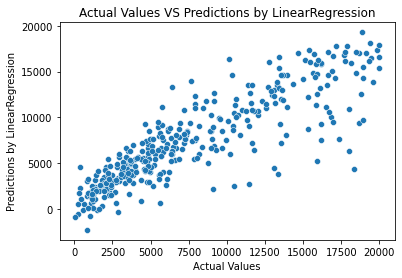

In [24]:
sns.scatterplot(y_test, predictions_list[0])
plt.title('Actual Values VS Predictions by LinearRegression')
plt.xlabel('Actual Values')
plt.ylabel('Predictions by LinearRegression')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions by DecisionTreeRegressor')

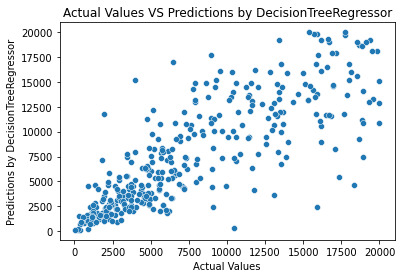

In [25]:
sns.scatterplot(y_test, predictions_list[1])
plt.title('Actual Values VS Predictions by DecisionTreeRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predictions by DecisionTreeRegressor')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions by GradientBoostingRegressor')

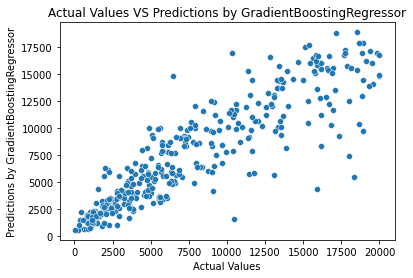

In [26]:
sns.scatterplot(y_test, predictions_list[2])
plt.title('Actual Values VS Predictions by GradientBoostingRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predictions by GradientBoostingRegressor')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions by RandomForestRegressor')

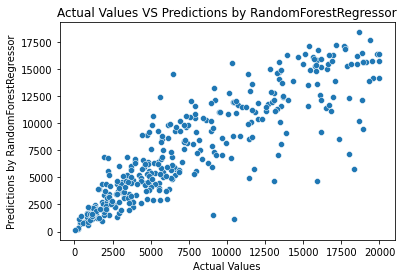

In [27]:
sns.scatterplot(y_test, predictions_list[3])
plt.title('Actual Values VS Predictions by RandomForestRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predictions by RandomForestRegressor')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions by AdaBoostRegressor')

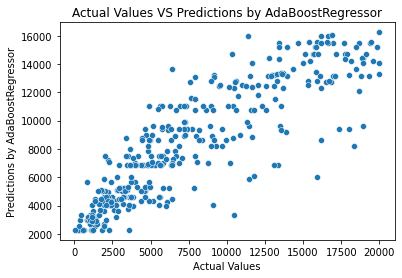

In [28]:
sns.scatterplot(y_test, predictions_list[4])
plt.title('Actual Values VS Predictions by AdaBoostRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predictions by AdaBoostRegressor')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions by XGBRegressor')

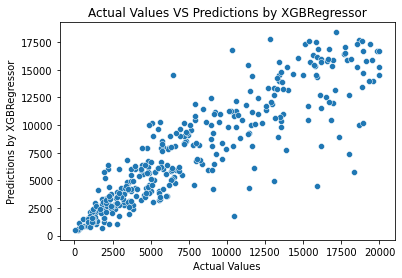

In [29]:
sns.scatterplot(y_test, predictions_list[5])
plt.title('Actual Values VS Predictions by XGBRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predictions by XGBRegressor')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions by LGBMRegressor')

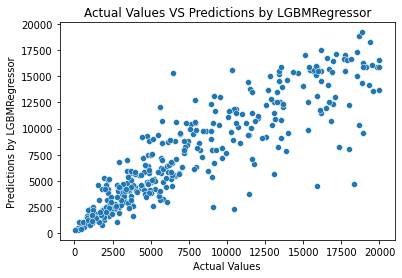

In [30]:
sns.scatterplot(y_test, predictions_list[6])
plt.title('Actual Values VS Predictions by LGBMRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predictions by LGBMRegressor')